<a href="https://colab.research.google.com/github/fmuigai2036/Milk-Distributing-Company/blob/main/DS_Project_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling

# Pre-requisites

In [ ]:
# Pre-requisite 1
# ---
# Importing pandas library for data manipulation
# 
import pandas as pd

In [ ]:
# Pre-requisite 2
# ---
# Importing numpy library for scientific computations
# ---
# 
# 
import numpy as np

In [ ]:
#Pre-requisite 3
#
#Importing seaborn for data visualisation
#
import seaborn as sns



In [ ]:
# Importing matplotlib for visualisation
# ---
# 

# Matplotlib is a plotting library for the python
# ---
#
import matplotlib.pyplot as plt

# The following line will make all graphs that we you draw, 
# to be within you notebook, no graph will move outside 
# the notebook space, everything will inline.
# ---
#
% matplotlib inline 

## Reading data

In [ ]:
# First we load our dataset
#
# We had downloaded our dataset from our browser
#So, we'll need to upload our downloaded file to our location or just drag the file
#
# 

# Let's read the milk excel file
df_milk = pd.read_excel("/content/Excelsample.xlsx")

# Previewing the first five records
df_milk.head()

,Delivery Date,Depot Name,Route Name,Weight,Sales_Amount
0,2019-01-01,Depot 1,Route 1,2639.94,248751.0
1,2019-01-01,Depot 1,Route 2,3389.89,259271.0
2,2019-01-01,Depot 1,Route 3,2160.94,198180.0
3,2019-01-01,Depot 1,Route 4,3097.03,283703.0
4,2019-01-01,Depot 1,Route 5,2438.94,220983.0


#Data Exploration

##Check total number of records

In [ ]:
#Determining the no. of records in the dataset 
#
#Shape returns no. or records/instances (left) and columns/variables (right)

#OUR CODE GOES BELOW
#
df_milk.shape

(3772, 5)

In [ ]:
# We can also previewing the last five records of our dataset
#
#OUR CODE GOES BELOW
#
df_milk.tail(5)


,Delivery Date,Depot Name,Route Name,Weight,Sales_Amount
3767,2019-01-30,Depot 17,Route 149,2003.26,219335.0
3768,2019-01-30,Depot 17,Route 146,1481.63,142161.0
3769,2019-01-30,Depot 17,Route 145,2559.52,246753.0
3770,2019-01-30,Depot 17,Route 144,1772.09,148114.0
3771,2019-01-30,Depot 17,Route 150,2058.16,178374.0


In [ ]:
#We can also check the datatypes of our dataset
#
#OUR CODE GOES BELOW
#
df_milk.dtypes

Delivery Date    datetime64[ns]
Depot Name               object
Route Name               object
Weight                  float64
Sales_Amount            float64
dtype: object

In [ ]:
df_milk.describe()

,Weight,Sales_Amount
count,3772.000000,3772.000000
mean,2365.279981,206309.702545
std,964.729879,94770.025019
min,1.000000,35.000000
25%,1750.235000,140687.000000
50%,2271.340000,196139.500000
75%,2887.315000,259431.000000
max,14082.520000,968620.000000


##Missing Data

In [ ]:
#Checking missing data
#
#OUR CODE GOES BELOW

df_milk.isnull()

,Delivery Date,Depot Name,Route Name,Weight,Sales_Amount
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3767,False,False,False,False,False
3768,False,False,False,False,False
3769,False,False,False,False,False
3770,False,False,False,False,False


In [ ]:
# We can also check for missing values in each column 
# ---
# OUR CODE GOES BELOW
#
df_milk.isnull().any()

Delivery Date    False
Depot Name       False
Route Name       False
Weight           False
Sales_Amount     False
dtype: bool

In [ ]:
# We can check how many missing values there are across each column by 
# ---
# OUR CODE GOES BELOW
#
df_milk.isnull().sum()

Delivery Date    0
Depot Name       0
Route Name       0
Weight           0
Sales_Amount     0
dtype: int64

##Duplicates

In [ ]:
df_milk[df_milk.duplicated()].shape

(0, 5)

In [ ]:
df_milk = df_milk.drop_duplicates()

There were no duplicates in our data set

##Outliers

In [ ]:
# Dealing with outliers.
# ---
# ---
# OUR CODE GOES BELOW
#  

# Let's read data from url as dataframe
# 
outliersc_df = pd.read_excel("/content/Excelsample.xlsx") 

# Lets preview our our dataframe below
#

outliersc_df.head()

,Delivery Date,Depot Name,Route Name,Weight,Sales_Amount
0,2019-01-01,Depot 1,Route 1,2639.94,248751.0
1,2019-01-01,Depot 1,Route 2,3389.89,259271.0
2,2019-01-01,Depot 1,Route 3,2160.94,198180.0
3,2019-01-01,Depot 1,Route 4,3097.03,283703.0
4,2019-01-01,Depot 1,Route 5,2438.94,220983.0


In [ ]:
outliersc_df.shape

(3772, 5)

In [ ]:
#There are many ways of dealing with the outliers however in this session we wiil 
# use the interquartile range (IQR). 
# The IQR is the first quartile subtracted from the third quartile, 
# i.e. the range covered by the middle 50% of the data. Values outside this range
# will be considered as outliers. If we were to use a box plot visualisation then,
# we would be able to visually see those values outside this range. 
# Something to note is that this method will consider only the numerical values in 
# our dataset. Lets now calculate the IQR for each column.
# ---
#

# We first defining our quantiles using the quantile() function
# ---
# 
Q1 = outliersc_df.quantile(0.25)
Q3 = outliersc_df.quantile(0.75)
IQR = Q3 - Q1
IQR

# Then filtering out our outliers by getting values which are outside our IQR Range.
# ---
#
#outliers_df_iqr = outliersc_df[((outliersc_df < (Q1 - 1.5 * IQR)) | (outliersc_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Checking the size of the dataset with outliers for cleaning purposes
# ---
#
#outliers_df_iqr.shape


Weight            1137.08
Sales_Amount    118744.00
dtype: float64

In [ ]:
# previewing the correlation between the Weight and the Sales_Amount variables
corr = outliersc_df.corr()
corr.Weight['Sales_Amount']

0.9156292253620739

There is a strong correlation between the Weight variable and the Sales Amount variable , implying that the more the weight,  the more the Sales Amount

In [ ]:
# A Box plot helps us visualize the distribution of numerical values in a variable.
#
#
df_outliers = pd.read_excel('/content/Excelsample.xlsx')
df_outliers.head()

,Delivery Date,Depot Name,Route Name,Weight,Sales_Amount
0,2019-01-01,Depot 1,Route 1,2639.94,248751.0
1,2019-01-01,Depot 1,Route 2,3389.89,259271.0
2,2019-01-01,Depot 1,Route 3,2160.94,198180.0
3,2019-01-01,Depot 1,Route 4,3097.03,283703.0
4,2019-01-01,Depot 1,Route 5,2438.94,220983.0


In [ ]:
# Checking for the unique values in the Depot Name feature
# ---
# 
df_outliers['Depot Name'].unique()

array(['Depot 1', 'Depot 2', 'Depot 3', 'Depot 4', 'Depot 5', 'Depot 6',
       'Depot 7', 'Depot 8', 'Depot 9', 'Depot 10', 'Depot 11',
       'Depot 12', 'Depot 13', 'Depot 14', 'Depot 15', 'Depot 16',
       'Depot 17'], dtype=object)

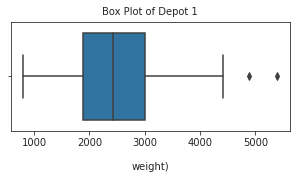

In [ ]:
# We will can now plot a box plot for depot name where feature
# Depot Name = Depot 1. 
#
plt.figure(figsize=(5,2))

# Seaborn also allows us to use a theme/appearance for our visualisations
# This is how we set a theme. Seaborn has 5 themes that we can use 
# i.e. darkgrid , whitegrid , dark , white , and ticks
# ----
sns.set_style('ticks')


sns.boxplot(x=df_outliers[df_outliers['Depot Name']=='Depot 1']['Weight']) 
plt.title("Box Plot of Depot 1", fontsize=10, y=1.01) 
plt.xlabel("weight)", labelpad=14)
plt.show()



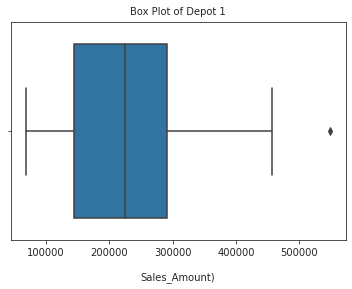

In [ ]:
#box plot

sns.boxplot(x=df_outliers[df_outliers['Depot Name']=='Depot 1']['Sales_Amount']) 
plt.title("Box Plot of Depot 1", fontsize=10, y=1.01) 
plt.xlabel("Sales_Amount)", labelpad=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


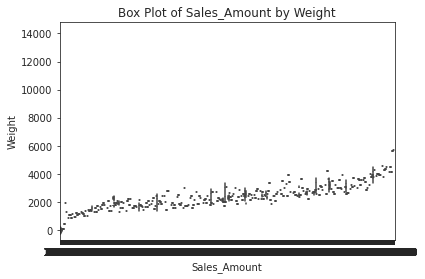

In [ ]:
# plotting a boxplot of Depot Name by Weight
sns.boxplot(df_outliers.Sales_Amount, df_outliers.Weight)
plt.title('Box Plot of Sales_Amount by Weight')
plt.show()